In [6]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns

import eikonax.solver as solve
import eikonax.tensorfield as tensorfield
import eikonax.utilities as utils

sns.set_theme(style="ticks")

In [7]:
disable_jit = False
log_compiles = False
mesh_bounds = (-1, 1)
num_points = 100
dimension = 2

solver_data = solve.SolverData(
    tolerance=1e-6,
    max_num_iterations=200,
    max_value=1000,
    softmin_order=50,
    drelu_order=10,
    drelu_cutoff=1,
)

initial_sites = solve.InitialSites(inds=jnp.array((0,)), values=jnp.array((0,)))

In [8]:
vertices, simplices = utils.create_test_mesh(mesh_bounds, num_points)
adjacent_vertex_inds = utils.get_adjacent_vertex_data(simplices, vertices.shape[0])
vertices = jnp.array(vertices, dtype=jnp.float32)
simplices = jnp.array(simplices, dtype=jnp.int32)
adjacent_vertex_inds = jnp.array(adjacent_vertex_inds, dtype=jnp.int32)
parameter_vector = jnp.ones(dimension * simplices.shape[0], dtype=jnp.float32)

Tensorfield = tensorfield.LinearTensorField
field_data = tensorfield.LinearTensorFieldData(dimension=2, num_simplices=simplices.shape[0])
with jax.disable_jit(disable_jit), jax.log_compiles(log_compiles):
    tensor_field = Tensorfield.assemble(parameter_vector, field_data)

In [11]:
mesh_data = solve.MeshData(vertices=vertices, adjacent_vertex_inds=adjacent_vertex_inds)
solver = solve.Solver(mesh_data, solver_data)
with jax.disable_jit(disable_jit), jax.log_compiles(log_compiles):
    solution_vector = solver.run(initial_sites, tensor_field)

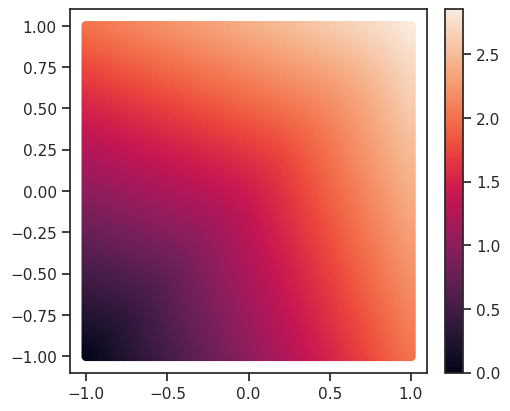

In [10]:
fig, ax = plt.subplots(figsize=(5, 4), layout="constrained")
ax.triplot(vertices[:, 0], vertices[:, 1], simplices)
scatter_plot = ax.scatter(vertices[:, 0], vertices[:, 1], c=solution_vector)
plt.colorbar(scatter_plot)